In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import datasets
import keras
from keras.datasets import mnist
from keras.models import Model
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob 
import os

path= '/content/drive/MyDrive/scalo_morletDOCC10_1700files/TEST'
path2 = '/content/drive/MyDrive/scalo_morletDOCC10_1700files/TEST'
def load_all_npy_files(directory):
   
    file_names = list(map(lambda p: os.path.splitext(os.path.basename(p))[0],
                          glob.glob(os.path.join(directory, '*.npy'))))

    results_list = []
    for file_name in file_names:
        results_list.append( np.load(os.path.join(directory, file_name + '.npy'), mmap_mode='r'))
    return results_list

In [ ]:
test_data = np.array( load_all_npy_files(path))
train_data = np.array( load_all_npy_files(path2))

In [ ]:
train_data.shape, test_data.shape

((716, 64, 32, 128), (716, 64, 32, 128))

In [ ]:
other_test_data = np.array( load_all_npy_files(path3))

In [ ]:
other_test_data.shape

In [ ]:
# region of interest

new_data = train_data[:,:,0:10,:]
new_test_data = test_data[:,:,0:10,:]

new_data.shape, new_test_data.shape,

((716, 64, 10, 128), (716, 64, 10, 128))

In [ ]:
#### mean data along the time axis 64

def preprocessing_profound(array):
   
    matrix = [] # 64, 
    for i in range(array.shape[0]):
        mean  = np.mean(array[i], axis  = 0)
        
        matrix.append(mean)
        
    return np.array(matrix)

In [ ]:
## calculate the moment

from scipy.stats import kurtosis

def preprocessing_moment(array):
   
    matrix = [] # 64, 
    for i in range(array.shape[0]):
        mean = np.mean(array[i,:,:])
        var = np.var(array[i,:,:])
        kurt = kurtosis(array[i,:,:], axis = None) 
        
        matrix.append(np.array([mean, var, kurt]))
        
    return np.array(matrix).T 

In [ ]:
def training_set(data_tr):
    all_data = []
    for i in range(data_tr.shape[0]):

        data = preprocessing_moment(data_tr[i,:,:,:])  #(1046, 64, 32, 128)  ==> (1046,3,64)
        all_data.append(data)
    
    return np.array(all_data)

In [ ]:
X_train = training_set(new_data)
X_test  = training_set(new_test_data)
X_train.shape, X_test.shape,

((716, 3, 64), (716, 3, 64))

In [ ]:
UDA = X_train[510:520]
GG = X_train[530:540]

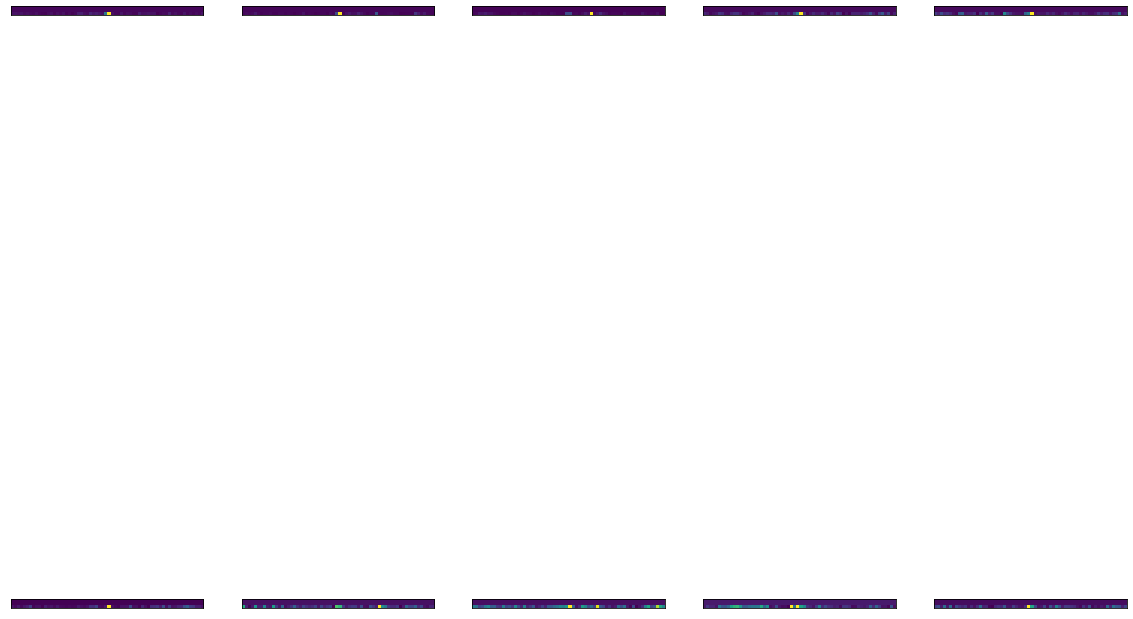

In [ ]:

fig, axs = plt.subplots(2,5,figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
          ax.imshow(UDA[i,:,:])
          ax.set_xticks([])
          ax.set_yticks([])

In [ ]:
# define labels for train

Y = []
a = np.ones((523,1))
b =  np.zeros((523,1))
b
Y.append(a)
Y.append(b)
Y  = np.array(Y)

Y_train = Y.reshape(1046,1 )
Y_train.shape

(1046, 1)

In [ ]:
# define labels for test

arr1_insert = np.array([ np.ones((358,1)) ])
arr2_insert = np.append(arr1_insert, [[0]*344 ] )

Y_test = arr2_insert.reshape(702,1)
Y_test.shape


(702, 1)

In [ ]:
# define labels for test

arr1 = np.array([ np.ones((363,1)) ])
arr2 = np.append(arr1_insert, [[0]*339 ] )

Y_ottest = arr2_insert.reshape(702,1)
Y_ottest.shape


(702, 1)

In [ ]:
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((716, 3, 64), (1046, 1), (716, 3, 64), (702, 1))

In [ ]:
X = X_train.reshape(716, 3*64)
Xtest = X_test.reshape(716, 3*64)
X.shape, Xtest.shape

((716, 192), (716, 192))

In [ ]:
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
def MLP():
 
    model = Sequential()
    model.add(Dense( 192 , input_dim = 192, activation='relu'))
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))   #### 
    model.add(Dense(10, activation ='relu' ))
    model.add(Dropout(0.5)) 
    model.add(Dense(1 , activation='sigmoid'))
    model.compile(Adam(lr=0.001), loss ='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
def MLP():
 
    model = Sequential()
    model.add(Dense( 192 , input_dim = 192, activation='relu'))
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))   #### 
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation ='relu' ))
    model.add(Dropout(0.5)) 
    model.add(Dense(1 , activation='sigmoid'))
    model.compile(Adam(lr=0.001), loss ='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
def MLP():

    model = Sequential()
    model.add(Dense( 192 , input_dim = 192, activation='relu'))
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))   ####
    model.add(Dense(10, activation ='relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(1 , activation='sigmoid'))
    model.compile(Adam(lr=0.001), loss ='binary_crossentropy',metrics=['accuracy'])
    return model


In [ ]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape =(32, 128,1), activation = 'relu' ))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(15,(3,3) ,activation= 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500 , activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(Adam(lr = 0.01), loss ='binary_crossentropy' , metrics = ['accuracy'])
    return model
     

In [ ]:
model1 =  MLP()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               37056     
                                                                 
 dense_1 (Dense)             (None, 100)               19300     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
h = model.fit (X ,Y_train  ,validation_split = 0.1  ,  epochs = 100  ,verbose =1 , shuffle = 1)

In [ ]:
def MLP():
 
    model = Sequential()
    model.add(Dense( 192 , input_dim = 192, activation='relu'))
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))   #### 
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation ='relu' ))
    model.add(Dropout(0.5)) 
    model.add(Dense(1 , activation='sigmoid'))
    model.compile(Adam(lr=0.001), loss ='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import train_test_split

new_Xtest,_, new_Ytest,_ = train_test_split(X_test, Y_test, test_size = 0.8, shuffle = True )
new_Xtest.shape

new_test = new_Xtest.reshape(140,3*64)
new_test.shape, new_Ytest.shape

In [ ]:
h3 = model1.fit(X ,Y_train  ,validation_data = (new_test, new_Ytest) ,  epochs = 100  , verbose =1, shuffle = 1)

Train on 1046 samples, validate on 140 samples
Epoch 1/100
1046/1046 [==============================] - 0s 324us/step - loss: 0.1085 - accuracy: 0.9627 - val_loss: 4.3888 - val_accuracy: 0.5357
Epoch 2/100
1046/1046 [==============================] - 0s 325us/step - loss: 0.1137 - accuracy: 0.9589 - val_loss: 4.0359 - val_accuracy: 0.5857
Epoch 3/100
1046/1046 [==============================] - 0s 265us/step - loss: 0.0813 - accuracy: 0.9732 - val_loss: 4.8507 - val_accuracy: 0.5429
Epoch 4/100
1046/1046 [==============================] - 0s 280us/step - loss: 0.0993 - accuracy: 0.9589 - val_loss: 4.8277 - val_accuracy: 0.5929
Epoch 5/100
1046/1046 [==============================] - 0s 295us/step - loss: 0.0840 - accuracy: 0.9675 - val_loss: 4.7678 - val_accuracy: 0.5357
Epoch 6/100
1046/1046 [==============================] - 0s 327us/step - loss: 0.0580 - accuracy: 0.9866 - val_loss: 5.1605 - val_accuracy: 0.5786
Epoch 7/100
1046/1046 [==============================] - 0s 304us/step 

Text(0.5, 0, 'epoch')

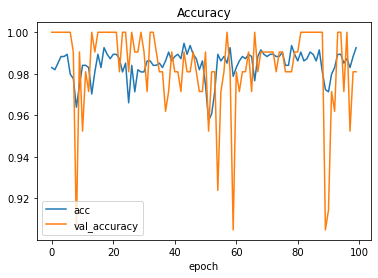

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

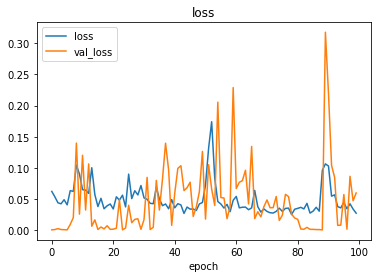

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch') 

In [ ]:
model.save('MLPmodel.h5')

In [ ]:
X.shape, Y_train.shape
preds = model.predict(X)
conf = confusion_matrix(Y_train, np.round(preds))
conf

array([[518,   5],
       [  1, 522]], dtype=int64)

In [ ]:
test_set  = ot_Xtest.reshape(702, 64*3)
test_set.shape

(702, 192)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(test_set)
conf = confusion_matrix(Y_ottest, np.round(preds))
print(classification_report(Y_ottest, np.round(preds)))
print(conf)

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90       344
         1.0       0.85      1.00      0.92       358

    accuracy                           0.91       702
   macro avg       0.92      0.91      0.91       702
weighted avg       0.92      0.91      0.91       702

[[282  62]
 [  1 357]]


In [ ]:
def metrics( VP, FN,FP,VN) :
    
    
    accuracy  = (VP+ VN)/(VP+VN+FN+FP)
    
    sensibilite = VP/(VP+FN)
    
    specifity = VN/(VN+FP)
    
    rappel = VP/(VP+FN)
    
    try:
        Precision = VP/(VP+FP)
        
    except ZeroDivisionError:
        
        Precision = 0
   
    
    metrics = {"accuray":accuracy ,"sensibilite":sensibilite, "specifity":specifity, "rappel":rappel  , "Precision":Precision }
    
    return accuracy,sensibilite,specifity, rappel, Precision

In [ ]:
def conf_matrix(y_pred, y_true, theta):

    vn = 0
    fn = 0
    fp = 0
    vp = 0

    for i in range (len(y_pred)):
        
        if y_pred[i] < theta  and y_true[i] == 0 :
                vn =  vn+1
        if y_pred[i] > theta and y_true[i] == 1 :

             vp = vp+1

        if y_pred[i] < theta  and y_true[i] == 1 :
                fn = fn+1

        if y_pred[i]> theta  and y_true[i] == 0 :
                fp = fp+1  

        
    coefficient = {"vn": vn , "vp":vp, "fp" :fp, "fn": fn}
    
    confusion_matrix =  np.array( [[vn, fn] ,[fp,vp]] )
    
    return confusion_matrix, coefficient

In [ ]:
confusion_mat,_ = conf_matrix(preds, Y_train, 0.5)
confusion_mat

array([[518,   1],
       [  5, 522]])

In [ ]:
def plot_ROC(y_pred,y_true):
    
        theta = np.linspace(0,1,100)
    
        All_sensibilite = []
        All_specifity = []

        for i in range(theta.shape[0]):


            _,coef = (conf_matrix(y_pred, y_true, theta[i]))
            _,sensibilite,specifity,_,_ = metrics(coef["vp"] , coef["fn"] , coef["fp"] , coef["vn"]) #VP, FN,FP,VN)
            specifitys = 1-specifity
            
            All_sensibilite.append(sensibilite)
            All_specifity.append(specifitys)
        plt.plot(All_specifity, All_sensibilite)
        plt.xlabel("1-specifity")
        plt.ylabel("sensibilite")   
        plt.title("roc curve")    
        return All_sensibilite, All_specifity

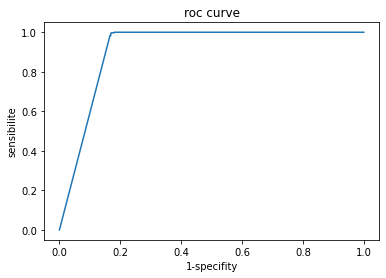

In [ ]:
All_sensibilite, All_specifity= plot_ROC(preds,Y_ottest)

In [ ]:


new_data.shape, new_test_data.shape

NameError: name 'new_data' is not defined

In [ ]:
## calculate entropy for every tensor and chose the indice of the image which has most entropy value

from scipy.stats import entropy

a = train_data
entropys = []
max_entropy=[]
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        
        ent = entropy(np.sum(a[i,j,:,:], axis = 1)+0.01)
        entropys.append(ent)

        
result = [entropys.index(max(entropys[i:i+64])) for i in range(0, len(entropys), 64)]
result = np.array(result) 
result.shape 
entropys = np.array(entropys)
new_array = entropys.reshape(1046,64)
new_array.shape
final = []
for i in range(train_data.shape[0]):
    nex_data = train_data[i]
    fi_data = nex_data[idex[i], :,:]
    final.append(fi_data)


final = np.array(final)
final.shape
final.shape,Y_train.shape

((1046, 32, 128), (1046, 1))

In [ ]:
x_conv = final.reshape(1046,32,128,1)
x_conv.shape, Y_train.shape

((1046, 32, 128, 1), (1046, 1))

In [ ]:
len(entropys)

66944

In [ ]:
entropys = np.array(entropys)
new_array = entropys.reshape(1046,64)
new_array.shape


(1046, 64)

In [ ]:
idex = np.argmax(new_array, axis = 1)
idex

array([63, 61, 56, ..., 14, 23, 56], dtype=int64)

In [ ]:
final_data=np.array(final_data)
final_data.shape

NameError: name 'final_data' is not defined

In [ ]:
idex[1045]

56

In [ ]:
final = []
for i in range(train_data.shape[0]):
    nex_data = train_data[i]
    fi_data = nex_data[idex[i], :,:]
    final.append(fi_data)
len(final )   

1046

In [ ]:
final = np.array(final)
final.shape

(1046, 32, 128)

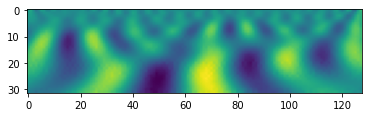

In [ ]:
plt.imshow(final[1000])

In [ ]:
final.shape,Y_train.shape

((1046, 32, 128), (1046, 1))

In [ ]:
x = final.reshape(1046, 32*128)
x.shape

(1046, 4096)

In [ ]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape =(32, 128,1), activation = 'relu' ))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(15,(3,3) ,activation= 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500 , activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(Adam(lr = 0.01), loss ='binary_crossentropy' , metrics = ['accuracy'])
    return model

In [ ]:
def MLP():
 
    model = Sequential()
    model.add(Dense( 1280 , input_dim = 1280, activation='relu'))
    model.add(Dense(100, activation ='relu' ))
    model.add(Dropout(0.5))   #### 
    model.add(Dense(10, activation ='relu' ))
    model.add(Dropout(0.5)) 
    model.add(Dense(1 , activation='sigmoid'))
    model.compile(Adam(lr=0.001), loss ='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model1 =  MLP()
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1280)              1639680   
_________________________________________________________________
dense_44 (Dense)             (None, 100)               128100    
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1010      
_________________________________________________________________
dropout_21 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 1,768,801
Trainable params: 1,768,801
Non-trainable params: 0
___________________________________________

In [ ]:
new_mat = final[:,0:10,:]
new_mat.shape
new_= new_mat.reshape(1046,10*128)
new_.shape

(1046, 1280)

In [ ]:
h2 = model1.fit(new_ ,Y_train , validation_split = 0.1 ,  epochs = 150 , verbose =1 , shuffle = 1)#validation_data=(Xt[0:350], Y_test[0:350])

Train on 941 samples, validate on 105 samples
Epoch 1/150
941/941 [==============================] - 0s 338us/step - loss: 0.6923 - accuracy: 0.5260 - val_loss: 0.7237 - val_accuracy: 0.0000e+00
Epoch 2/150
941/941 [==============================] - 0s 156us/step - loss: 0.6877 - accuracy: 0.5505 - val_loss: 0.7814 - val_accuracy: 0.0000e+00
Epoch 3/150
941/941 [==============================] - 0s 148us/step - loss: 0.6880 - accuracy: 0.5367 - val_loss: 0.7847 - val_accuracy: 0.0000e+00
Epoch 4/150
941/941 [==============================] - 0s 147us/step - loss: 0.6935 - accuracy: 0.5430 - val_loss: 0.7471 - val_accuracy: 0.0000e+00
Epoch 5/150
941/941 [==============================] - 0s 146us/step - loss: 0.6896 - accuracy: 0.5547 - val_loss: 0.7426 - val_accuracy: 0.0000e+00
Epoch 6/150
941/941 [==============================] - 0s 145us/step - loss: 0.6889 - accuracy: 0.5569 - val_loss: 0.7631 - val_accuracy: 0.0000e+00
Epoch 7/150
941/941 [==============================] - 0s 14